In [1]:
run readPerchlorate.py

c:\Users\tacse\Documents\Modified HPLC Introduction Paper\Reservoir Inject Upload\dataAnalyzerMN_IsoX.py:108: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mergedDf = mergedDf[mergedDf['retTime'].between(timeBounds[0], timeBounds[1], inclusive=True)]


20230106_08_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1
20230106_09_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2
20230106_10_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3
20230106_11_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4
20230106_12_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_5
20230106_13_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_6
20230106_14_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_7
20230106_08_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1 37Cl17O has 21 zero scans, out of 14251 scans (0.0014735808013472739)
20230106_09_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2 37Cl17O has 22 zero scans, out of 14282 scans (0.001540400504131074)
20230106_10_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3 37Cl17O has 30 zero scans, out of 14323 scans (0.002094533268170076)
20230106_11_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4 37Cl17O has 29 zero sc

100%|██████████| 12330/12330 [00:02<00:00, 5576.47it/s]


18O


100%|██████████| 12330/12330 [00:02<00:00, 5803.95it/s]


37Cl


100%|██████████| 12330/12330 [00:02<00:00, 5714.76it/s]


37Cl17O


100%|██████████| 12330/12330 [00:02<00:00, 5654.95it/s]


37Cl18O


100%|██████████| 12330/12330 [00:03<00:00, 3165.28it/s]


Unsub
20230106_15_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1
20230106_16_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2
20230106_17_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3
20230106_18_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_4
20230106_19_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_5
20230106_20_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_6
20230106_21_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_7
File 20230106_15_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_1 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.058352587772418
File 20230106_16_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_2 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.015838390656839
File 20230106_17_Perchlorate_High_Precision_Same_Line_Same_Reservoir_STD_3 98.9 37Cl17O/Unsub fails RSE/SN Test with value of 2.0411675212529117
File 20230106_18_Perchlorate_High_Precision_Same_Line_Same_Reservoir_ST

100%|██████████| 12694/12694 [00:02<00:00, 4625.26it/s]


18O


100%|██████████| 12694/12694 [00:02<00:00, 5302.39it/s]


37Cl


100%|██████████| 12694/12694 [00:02<00:00, 5604.48it/s]


37Cl17O


100%|██████████| 12694/12694 [00:02<00:00, 4578.72it/s]


37Cl18O


100%|██████████| 12694/12694 [00:08<00:00, 1421.44it/s]


Unsub


In [ ]:
#Read in results from dataframes and compute ratios

import numpy as np

triplicateNameDict = {'20230106_08_to_14_Perchlorate_High_Precision_Same_Line_Same_Reservoir_Combined_5e5.isox':'5e5',
'20230106_15_to_21_Perchlorate_High_Precision_Same_Line_Same_Reservoir_Combined_2e5.isox':'2e5_S',
'20230106_22_to_28_Perchlorate_High_Precision_Different_Line_Same_Reservoir_Combined_2e5.isox':'2e5_D'}

triplicateRatios = {}

#Go through each triplicate, i.e. each set of 7 files.
for triplicateIdx, (triplicateName, triplicateData) in enumerate(allTriplicates.items()):
    thisName = triplicateNameDict[triplicateName]
    triplicateRatios[thisName] = {}
    ratioKeys = ['37Cl/Unsub','17O/Unsub','18O/Unsub','37Cl17O/Unsub','37Cl18O/Unsub']
    allOutputDict = triplicateData['allOutputDict']
    #Go through each of the 7 files for this triplicate
    for fileNumber, (fileKey, fileData) in enumerate(allOutputDict.items()):
        #98.9 is the mass of the main perchlorate peak, so use as an index
        thisFileData = fileData['98.9']
        #go through by ratio
        for ratIdx, ratioKey in enumerate(ratioKeys):
            if ratioKey not in triplicateRatios[thisName]:
                triplicateRatios[thisName][ratioKey] = {'Ratio':[],'StError':[],'RelStError':[],'SN':[]}
            #Pull out relevant info
            triplicateRatios[thisName][ratioKey]['Ratio'].append(thisFileData[ratioKey]['Ratio']),
            triplicateRatios[thisName][ratioKey]['StError'].append(thisFileData[ratioKey]['StError'])
            triplicateRatios[thisName][ratioKey]['RelStError'].append(thisFileData[ratioKey]['RelStError'])
            triplicateRatios[thisName][ratioKey]['SN'].append(thisFileData[ratioKey]['ShotNoiseLimit'])

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import copy

#Compute sample standard comparisons
standardizedTriplicates = {}

#For each triplicate
for triplicateIdx, (triplicateKey, triplicateData) in enumerate(triplicateRatios.items()):
    standardizedTriplicates[triplicateKey] = {}
    #Prepare perchlorate data for plotting
    linearStandardization = {}
    linearSamples = {}

    #Go through files and standardize measurements; for each file...
    for fileIdx in range(7):
        #for each isotope
        for isotopeKey, isotopeData in triplicateData.items():
            if isotopeKey not in linearStandardization:
                linearStandardization[isotopeKey] = {'Values':[],'RelStdError':[]}
            if isotopeKey not in linearSamples:
                linearSamples[isotopeKey] = {'Values':[],'RelStdError':[]}
            
            #If it is a standard file
            if fileIdx % 2 == 0:
                linearStandardization[isotopeKey]['Values'].append(isotopeData['Ratio'][fileIdx])
                linearStandardization[isotopeKey]['RelStdError'].append(isotopeData['RelStError'][fileIdx])

            #If it is a sample file
            else:
                linearSamples[isotopeKey]['Values'].append(isotopeData['Ratio'][fileIdx])
                linearSamples[isotopeKey]['RelStdError'].append(isotopeData['RelStError'][fileIdx])

    #Fill in the standardized values
    standardizationDict = {}
    #First pull out only standards
    for subKey, subData in linearStandardization.items():
        thisVals = subData['Values']

        #Perform a linear regression
        n = len(thisVals)
        xs = np.arange(0,n,1)
        slope, intercept, r_value, p_value, slope_serr = stats.linregress(xs,thisVals)

        #calculate useful intermediates
        predictions = slope * xs + intercept 
        yerr = thisVals - predictions 
        s_err = np.sum(yerr**2)
        mean_x = np.mean(xs)       
        # appropriate t value (where n=4, two tailed 68%)            
        t = stats.t.ppf(1-0.16, n-2)              

        #Define a function to calculate the error in this regression at a certain x value
        def errorAtX(thisX):
            pointErr = np.sqrt(s_err / (n-2)) * np.sqrt(1.0/n + (thisX - mean_x)**2 / np.sum((xs-mean_x)**2))
            return pointErr
        
        #Standardize sample values
        smpxs = np.arange(0.5,3.5,1)
        smpPreds = slope * smpxs + intercept
        smpErr = errorAtX(smpxs)

        #fill in dictionary
        standardizationDict[subKey] = {'Values':smpPreds, 'RelStdError': smpErr / smpPreds}

    #Convert to delta values and fill in another dictionary with these
    deltasDict = {}
    for subKey, subData in linearSamples.items():
        standardizedVals = np.array(subData['Values']) / standardizationDict[subKey]['Values']
        standardizedErrs = np.sqrt(np.array(subData['RelStdError'])**2 + standardizationDict[subKey]['RelStdError']**2)
        standardizedDeltas = 1000*(standardizedVals - 1)

        deltasDict[subKey] = {'Deltas':standardizedDeltas, 'RSEs':1000*standardizedErrs}

    #Add the results for this replicate to the output
    standardizedTriplicates[triplicateKey] = copy.deepcopy(deltasDict)

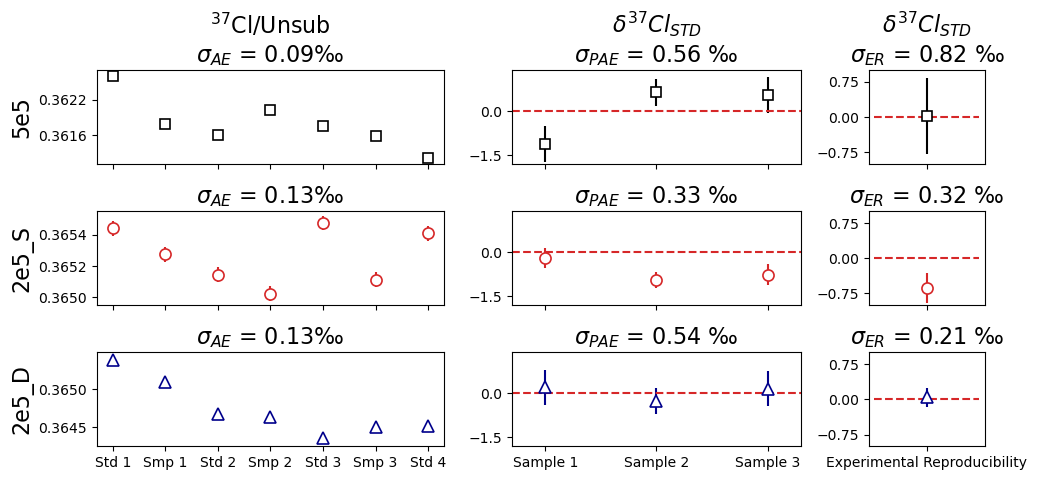

In [ ]:
#First output plot; the 37Cl data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15*0.7,7*0.7), 
                         gridspec_kw={'width_ratios': [3, 2.5, 1]}, sharex = 'col')

#Parameters for the scatter plots
plotParamsDict = {'5e5':{   'marker' : 's',
                            'markersize' : 7,
                            'mfc' : 'w',
                            'mec' : 'k',
                            'mew' : 1.2,
                            'deltaYlim':(-1.8,1.4)},
                            
                '2e5_S':{   'marker' : 'o',
                            'markersize' : 8,
                            'mfc' : 'w',
                            'mec' : 'tab:red',
                            'mew' : 1.2,
                            'deltaYlim':(-1.8,1.4)},
                    
                '2e5_D':{   'marker' : '^',
                            'markersize' : 8,
                            'mfc' : 'w',
                            'mec' : 'darkblue',
                            'mew' : 1.2,
                            'deltaYlim':(-1.8,1.4)}}

actualValueColor = 'tab:red'

plotKeys = ['5e5','2e5_S','2e5_D']

#For each experiment
for plotIdx, plotKey in enumerate(plotKeys):
    #Get the new axes, plot raw values with relevant parameters
    cAx = axes[plotIdx,0]

    cAx.errorbar(range(7), triplicateRatios[plotKey]['37Cl/Unsub']['Ratio'], triplicateRatios[plotKey]['37Cl/Unsub']['StError'],
    fmt = plotParamsDict[plotKey]['marker'], 
    markersize = plotParamsDict[plotKey]['markersize'], 
    mfc = plotParamsDict[plotKey]['mfc'], 
    mec = plotParamsDict[plotKey]['mec'], 
    ecolor = plotParamsDict[plotKey]['mec'], 
    mew  = plotParamsDict[plotKey]['mew'])

    #add labels
    xticks = list(range(7))
    xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

    #beautify axis
    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    #cAx.set_ylim(0.0596,0.0619)
    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

    if plotIdx == 0:
        thisAE = 1000 *np.array(triplicateRatios[plotKey]['37Cl/Unsub']['RelStError']).mean()
        cAx.set_title(u"$^{37}$Cl/Unsub\n" + "$\sigma_{AE}$ = " + "{:.2f}".format(thisAE) + "‰", fontsize = 16)

    else:
        thisAE = 1000 *np.array(triplicateRatios[plotKey]['37Cl/Unsub']['RelStError']).mean()
        cAx.set_title("$\sigma_{AE}$ = " + "{:.2f}".format(thisAE) + "‰", fontsize = 16)
    cAx.set_ylabel(plotKey, fontsize = 16)

    #Plot standardized values with relevant parameters
    cAx = axes[plotIdx,1]
    
    thisDeltas = np.array(standardizedTriplicates[plotKey]['37Cl/Unsub']['Deltas'])
    cAx.errorbar(range(3),thisDeltas, standardizedTriplicates[plotKey]['37Cl/Unsub']['RSEs'],    
            fmt = plotParamsDict[plotKey]['marker'], 
            markersize = plotParamsDict[plotKey]['markersize'], 
            mfc = plotParamsDict[plotKey]['mfc'], 
            mec = plotParamsDict[plotKey]['mec'], 
            ecolor = plotParamsDict[plotKey]['mec'], 
            mew  = plotParamsDict[plotKey]['mew'])

    xticks = list(range(3))
    xtickLabels = ['Sample 1', 'Sample 2','Sample 3']

    #Beautify axis
    cAx.set_xlim(-0.3,2.3)

    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    if plotIdx == 0:
        thisPAE = np.array(standardizedTriplicates[plotKey]['37Cl/Unsub']['RSEs']).mean()
        cAx.set_title(u"$\delta^{37}Cl_{STD}$\n" + "$\sigma_{PAE}$ = " + "{:.2f}".format(thisPAE) + " ‰", fontsize = 16)

    else:
        thisPAE = np.array(standardizedTriplicates[plotKey]['37Cl/Unsub']['RSEs']).mean()
        cAx.set_title("$\sigma_{PAE}$ = " + "{:.2f}".format(thisPAE) + " ‰", fontsize = 16)

    cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
            label = "Independent  Value")

    cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
    cAx.set_ylim(plotParamsDict[plotKey]['deltaYlim'])

    cAx = axes[plotIdx, 2]
       
    theseDeltas = standardizedTriplicates[plotKey]['37Cl/Unsub']['Deltas']
    cAx.errorbar(range(1),theseDeltas.mean(), theseDeltas.std(), 
             fmt = plotParamsDict[plotKey]['marker'], 
            markersize = plotParamsDict[plotKey]['markersize'], 
            mfc = plotParamsDict[plotKey]['mfc'], 
            mec = plotParamsDict[plotKey]['mec'], 
            ecolor = plotParamsDict[plotKey]['mec'], 
            mew  = plotParamsDict[plotKey]['mew'])
    
    if plotIdx == 0:
        thisER = theseDeltas.std()
        cAx.set_title(u"$\delta^{37}Cl_{STD}$\n" + "$\sigma_{ER}$ = " + "{:.2f}".format(thisER) + " ‰", fontsize = 16)

    else:
        thisER = theseDeltas.std()
        cAx.set_title("$\sigma_{ER}$ = " + "{:.2f}".format(thisER) + " ‰", fontsize = 16)

    xticks = list(range(1))
    xtickLabels = ['Experimental Reproducibility']
    cAx.set_xticks(xticks)
    cAx.set_xticklabels(xtickLabels)
    cAx.set_ylim(-1,1)
    cAx.set_yticks([-0.75,0,0.75])

    cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor, 
            label = "Independently Measured\nor Estimated Value")

plt.tight_layout()

#Output as vector format
fig.savefig('Perchlorate Replicability.eps')

In [ ]:
triplicateRatios['5e5']

{'37Cl/Unsub': {'Ratio': [0.3625973309476961,
   0.3617876147720825,
   0.3616117859156423,
   0.36203157442882655,
   0.361757984116295,
   0.36159595673493455,
   0.361217302627964],
  'StError': [3.3372613787602136e-05,
   3.333497694545622e-05,
   3.299079634493226e-05,
   3.300167379691338e-05,
   3.306311811138863e-05,
   3.2760032639018886e-05,
   3.289581804182894e-05],
  'RelStError': [9.20376708244884e-05,
   9.213962994962238e-05,
   9.123263574331737e-05,
   9.115689383993587e-05,
   9.139568320006938e-05,
   9.059844843075335e-05,
   9.106933085016144e-05],
  'SN': [7.50467794459041e-05,
   7.509454070208197e-05,
   7.493951932383073e-05,
   7.482499699460685e-05,
   7.478468605089817e-05,
   7.476062879292734e-05,
   7.481000542762878e-05]},
 '17O/Unsub': {'Ratio': [0.0015798831944745684,
   0.0015799926202385497,
   0.0015799531549391226,
   0.0015789317911449306,
   0.0015816083086938216,
   0.0015802506403115404,
   0.0015727837066655027],
  'StError': [1.7527316955443

1.6372049506929285
1.7485696196635045
1.1309252220448742
1.7545561193689818
1.39134469101312
1.1917770304865511
1.2079685082060057
1.3962213261708452


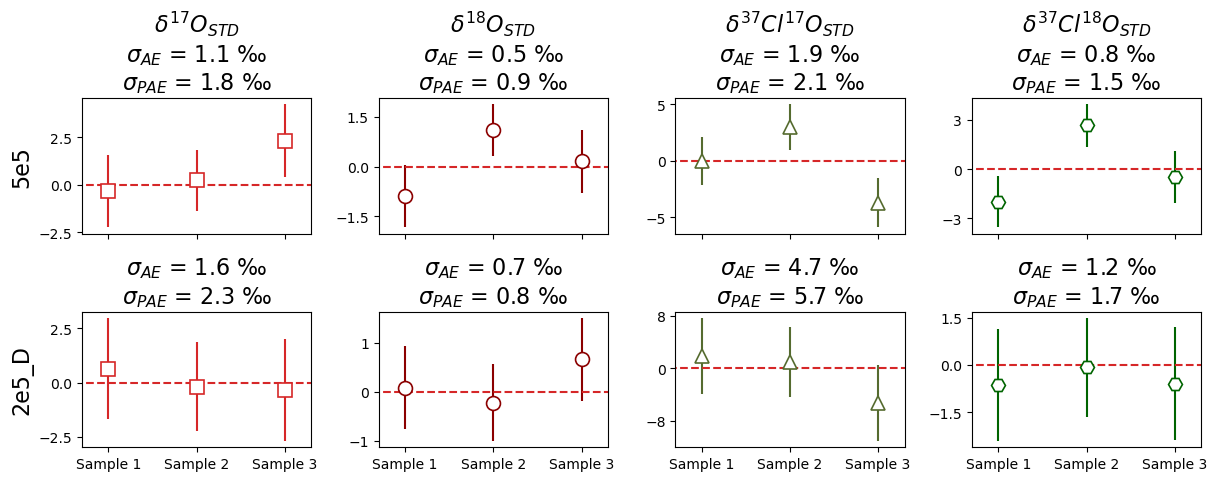

In [ ]:
#Second output plot; remaining data

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15*0.82,6*0.82), 
                         gridspec_kw={'width_ratios': [1,1,1,1]}, sharex = 'col')

#relevant plot parameters
plotParamsDict = {'17O/Unsub':{   'marker' : 's',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'tab:red',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                            
                '18O/Unsub':{   'marker' : 'o',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkred',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                    
                '37Cl17O/Unsub':{   'marker' : '^',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkolivegreen',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)},
                            
                '37Cl18O/Unsub':{   'marker' : 'H',
                            'markersize' : 10,
                            'mfc' : 'w',
                            'mec' : 'darkgreen',
                            'mew' : 1.2,
                            'deltaYlim':(-1.2,1.2)}}

actualValueColor = 'tab:red'

#Ignore 2e5_S because it is qualitatively similar and adds clutter
plotKeys = ['5e5','2e5_D']

ratKeys = ['17O/Unsub','18O/Unsub','37Cl17O/Unsub','37Cl18O/Unsub']
fancyRatKeys = [u"$\delta^{17}O_{STD}$",u"$\delta^{18}O_{STD}$",u"$\delta^{37}Cl^{17}O_{STD}$",u"$\delta^{37}Cl^{18}O_{STD}$"]

#Go through each plot, then each ratio
for plotIdx, plotKey in enumerate(plotKeys):
    for ratIdx, ratKey in enumerate(ratKeys):
        cAx = axes[plotIdx,ratIdx]
    
        #Plot standardized values
        thisDeltas = np.array(standardizedTriplicates[plotKey][ratKey]['Deltas'])
        cAx.errorbar(range(3),thisDeltas, np.array(standardizedTriplicates[plotKey][ratKey]['RSEs']),    
                fmt = plotParamsDict[ratKey]['marker'], 
                markersize = plotParamsDict[ratKey]['markersize'], 
                mfc = plotParamsDict[ratKey]['mfc'], 
                mec = plotParamsDict[ratKey]['mec'], 
                ecolor = plotParamsDict[ratKey]['mec'], 
                mew  = plotParamsDict[ratKey]['mew'])

        #label axis
        xticks = list(range(3))
        xtickLabels = ['Sample 1', 'Sample 2','Sample 3']

        #beautify axis
        cAx.set_xlim(-0.3,2.3)

        cAx.set_xticks(xticks)
        cAx.set_xticklabels(xtickLabels)
        if ratIdx == 0:
            cAx.set_ylabel(plotKeys[plotIdx], fontsize = 16)

        cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
                label = "Independent  Value")

        cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

        #Add precision labels
        if plotIdx == 0:
            thisPAE = np.array(standardizedTriplicates[plotKey][ratKey]['RSEs']).mean()
            thisER = np.array(standardizedTriplicates[plotKey][ratKey]['Deltas']).mean()
            thisAE = 1000 * np.array(triplicateRatios[plotKey][ratKey]['RelStError']).mean()
            cAx.set_title(fancyRatKeys[ratIdx] + '\n'  + "$\sigma_{AE}$ = " + "{:.1f}".format(thisAE) + " ‰" + '\n'  + "$\sigma_{PAE}$ = " + "{:.1f}".format(thisPAE) + " ‰", fontsize = 16)     
            print(thisPAE / thisAE)                  

        else:
            thisPAE = np.array(standardizedTriplicates[plotKey][ratKey]['RSEs']).mean()
            thisER = np.array(standardizedTriplicates[plotKey][ratKey]['Deltas']).mean()
            thisAE = 1000* np.array(triplicateRatios[plotKey][ratKey]['RelStError']).mean()

            print(thisPAE / thisAE)
            cAx.set_title("$\sigma_{AE}$ = " + "{:.1f}".format(thisAE) +" ‰"+ '\n' +  "$\sigma_{PAE}$ = " + "{:.1f}".format(thisPAE) + " ‰", fontsize = 16)       
        #cAx.set_ylim(plotParamsDict[plotKey]['deltaYlim'])

plt.tight_layout()

#Output
fig.savefig('Perchlorate Other Data.eps')

In [ ]:
#Optional csv output
import csv
    
with open('PerchlorateTable.csv', 'w', newline='') as csvfile:
    write = csv.writer(csvfile, delimiter=',')

    #Iterate through this dictionary and prepare to make a csv
    for triplicateKey, triplicateData in standardizedTriplicates.items():
        #header
        headerRow = ['','Sample 1','Sample 2','Sample 3','ER']
        write.writerow(headerRow)
        for subKey, subData in triplicateData.items():
            #Fill in each sample acquisition
            thisRow = [subKey]
            for repIdx in range(3):
                thisVal = subData['Deltas'][repIdx]
                thisErr = subData['RSEs'][repIdx]
                thisRow.append(f"{thisVal:.1f}" + ' +/- ' + f"{thisErr:.1f}")

            #Fill in average across all samples
            thisER = np.array(subData['Deltas']).mean()
            thisERErr = np.array(subData['Deltas']).std()

            thisRow.append(f"{thisER:.1f}" + ' +/- ' + f"{thisERErr:.1f}")

            write.writerow(thisRow)